In [ ]:
#Source: https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f

!pip install yfinance
!pip install giotto-tda
!pip install kmapper
!pip install umap-learn
!pip install umap-learn[plot]

from gtda.homology import VietorisRipsPersistence
import gtda.time_series
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from scipy import stats
import gtda.diagrams
import pandas as pd
import numpy as np
import math
import yfinance as yf
import datetime
import time
import requests
import io
import umap
import sys
import sklearn
from sklearn import ensemble
import kmapper as km
import umap.plot

In [2]:
##############Downloading Stock Data####################################################

start = datetime.datetime(1987,12,22)
end = datetime.datetime(2016,12,8)
Symbols = ['^GSPC','^DJI','^IXIC','^RUT']
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : ^GSPC,1 : ^DJI,2 : ^IXIC,3 : ^RUT,

In [3]:
#####################################Calculating Log returns###########################################

gspc_1 = stock_final[stock_final['Name'] == '^GSPC'].index
gspc = stock_final[stock_final['Name'] == '^GSPC']['Close']
dji_1 = stock_final[stock_final['Name'] == '^DJI'].index
dji = stock_final[stock_final['Name'] == '^DJI']['Close']
ixic_1 = stock_final[stock_final['Name'] == '^IXIC'].index
ixic = stock_final[stock_final['Name'] == '^IXIC']['Close']
rut_1 = stock_final[stock_final['Name'] == '^RUT'].index
rut = stock_final[stock_final['Name'] == '^RUT']['Close']

date = gspc_1[1:]
adjusted_gspc = []
adjusted_dji = []
adjusted_ixic = []
adjusted_rut = []
for i in range(1,7301):
  adjusted_gspc.append(math.log(gspc[i]/gspc[i-1]))
  #adjusted_dji.append(math.log(dji[i]/dji[i-1]))
  adjusted_ixic.append(math.log(ixic[i]/ixic[i-1]))
  adjusted_rut.append(math.log(rut[i]/rut[i-1]))

In [16]:
##########################Storing File in G-Drive####################################################
adjusted_prices = pd.DataFrame()
adjusted_prices['Dates'] = gspc_1[1:]
adjusted_prices['GSPC'] = adjusted_gspc
#adjusted_prices['DJI'] = adjusted_dji
adjusted_prices['IXIC'] = adjusted_ixic
adjusted_prices['RUT'] = adjusted_rut
adjusted_prices.to_csv('Adjusted_prices.csv')

!zip Adjusted_prices.zip *.csv
!mv Adjusted_prices.zip "/content/drive/My Drive"

  adding: Adjusted_prices.csv (deflated 58%)


In [ ]:
##########################Landscape calculations###############################################
l_1 = []
l_2 = []

for i in range(0, 7300-100):
  point_cloud = []
  for j in range(i,i+100):
    point_cloud.append([adjusted_gspc[j], adjusted_ixic[j], adjusted_rut[j]])
  pointcloud = np.array(point_cloud).reshape(1,100,3)
  VR = VietorisRipsPersistence() 
  diagrams = VR.fit_transform(pointcloud)
  value = gtda.diagrams.Amplitude(metric_params={"n_layers":250} , metric ='landscape', order = None).fit_transform(diagrams)
  l_1.append(value[0][0])
  l_2.append(value[0][1])

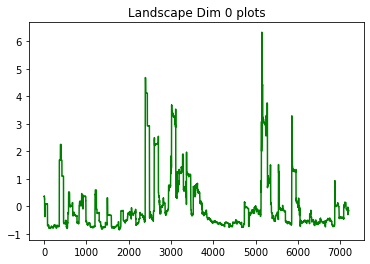

In [ ]:
#Landscape dim 0 plots:
plt.title("Landscape Dim 0 plots") 
y_1 = stats.zscore(np.array(l_1))
plt.plot(np.arange(0,7200), y_1 , color ="green")  
plt.show()

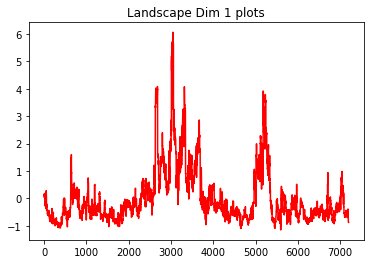

In [ ]:
#Landscape dim 1 plots:
plt.title("Landscape Dim 1 plots") 
y_2 = stats.zscore(np.array(l_2))
plt.plot(np.arange(0,7200), y_2 , color ="red")  
plt.show()

In [ ]:
ord_1 = np.argsort(-y_1)[:100]
ord_2 = np.argsort(-y_2)[:100]
#First 100 highest valuescorresponding to dim 0
gspc_1[ord_1]

DatetimeIndex(['2008-05-22', '2008-05-21', '2008-05-23', '2008-05-27',
               '2008-05-28', '2008-06-05', '2008-06-04', '2008-06-03',
               '2008-05-29', '2008-05-30', '2008-06-02', '1997-06-09',
               '1997-06-06', '1997-06-10', '1997-06-11', '1997-06-13',
               '1997-06-16', '1997-06-17', '1997-06-18', '1997-06-12',
               '1997-06-19', '1997-06-20', '1997-06-05', '2008-06-17',
               '2008-06-13', '2008-06-23', '2008-06-18', '2008-06-19',
               '2008-06-20', '2008-06-16', '2008-06-12', '2008-06-11',
               '2008-06-06', '2008-06-10', '2008-06-09', '1997-08-08',
               '1997-08-11', '1997-08-12', '1997-08-13', '1997-08-14',
               '1997-07-25', '1997-07-28', '1997-08-05', '1997-08-04',
               '1997-08-01', '1997-07-31', '1997-07-30', '1997-08-06',
               '1997-07-24', '1997-08-07', '1997-07-18', '1997-07-22',
               '1997-07-29', '1997-07-23', '1997-07-02', '1997-06-26',
      

In [ ]:
#First 100 highest valuescorresponding to dim 1
gspc_1[ord_2]

DatetimeIndex(['2000-01-11', '1999-12-01', '1999-11-30', '2000-01-24',
               '2000-01-25', '2000-01-26', '1999-12-02', '1999-11-29',
               '2000-01-27', '1999-12-07', '1999-12-06', '1999-12-03',
               '2000-01-12', '2000-01-13', '2000-01-19', '2000-01-18',
               '1999-11-23', '2000-01-14', '2000-01-20', '1999-11-18',
               '1999-11-19', '1999-11-22', '1999-11-24', '2000-01-21',
               '1999-11-26', '2000-01-03', '1999-12-31', '1999-12-30',
               '1999-12-29', '2000-01-04', '2000-01-05', '2000-01-07',
               '2000-01-10', '2000-01-06', '1999-12-09', '1999-12-08',
               '1998-07-29', '2001-02-06', '2001-02-07', '1999-12-14',
               '1999-12-13', '1999-12-10', '1998-07-28', '1999-12-15',
               '1999-12-21', '1999-12-22', '1998-06-02', '1998-06-03',
               '2001-02-05', '1998-06-01', '1998-05-29', '1998-07-31',
               '1998-08-03', '1998-05-28', '1998-07-08', '1998-07-30',
      

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



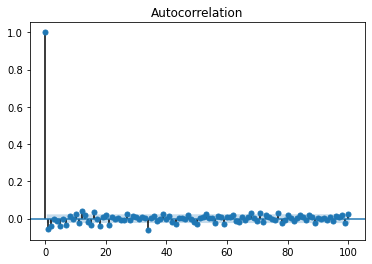

In [ ]:
#Auto Correlation Plots
fig = tsaplots.plot_acf(adjusted_prices['GSPC'], lags=100)
plt.show()

In [17]:
# Time delay = 1
# Embedding dimension = 100

pl_brewer = [[0.0, '#006837'],[0.1, '#1a9850'],[0.2, '#66bd63'],[0.3, '#a6d96a'],[0.4, '#d9ef8b'],[0.5, '#ffffbf'],
             [0.6, '#fee08b'],[0.7, '#fdae61'],[0.8, '#f46d43'],[0.9, '#d73027'],[1.0, '#a50026']]
tooltips = []
tooltip_s = np.array(gspc_1[101:])
for i in range(0,7200):
  tooltips.append(str(tooltip_s[i].astype('datetime64[D]')))

color = []
for i in range(0,7200): 
 color.append(int((int(tooltips[i][:4]) - 1987)/3))

X= np.zeros((7200,100))
Y= np.zeros((7200,100))
Z= np.zeros((7200,100))
for i in range(0,7200):
  X[i] = [adjusted_prices['GSPC'][j] for j in range(i,i+100)]
  Y[i] = [adjusted_prices['IXIC'][j] for j in range(i,i+100)]
  Z[i] = [adjusted_prices['RUT'][j] for j in range(i,i+100)]

In [ ]:
#Mapper: Lens

mapper = km.KeplerMapper(verbose=0)
lens1 = mapper.fit_transform(X, projection="l2norm")
lens2 = mapper.fit_transform(X, projection=umap.UMAP(n_components=2, random_state=1))
lens3 = l_1
lens4 = l_2
lens5 = mapper.fit_transform(Y, projection=umap.UMAP(n_components=2, random_state=1))
lens6 = mapper.fit_transform(Z, projection=umap.UMAP(n_components=2, random_state=1))

lens = np.c_[lens1, lens2]

In [ ]:
#Mapper: Plots
eps = 10
no = 10
graph = mapper.map(lens=lens,
							   clusterer= sklearn.cluster.DBSCAN(eps = eps), 
							   cover=km.Cover(no, 0.50), remove_duplicate_nodes=True)

mapper.visualize(graph,
                path_html="Financial_Data_1.html",
                title="Financial Data: Lenses UMAP",
                color_values = np.array(color),
                custom_tooltips = np.array(tooltips), colorscale = pl_brewer)

In [ ]:
#Umap PLots
umap_plot = umap.UMAP(random_state = 3142).fit(Z)
hover_data = pd.DataFrame({'label':color})
umap.plot.points(umap_plot, labels = np.array(color), theme = 'fire')

In [ ]:
#Hover
digits_df = pd.DataFrame(embedding_6[:10000,:], columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in digit[:10000]]
digits_df['image'] = tooltip_s

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in [0,1,2,3,4,5,6,7,8,9]],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Digits dataset: 110 normalised',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)

show(plot_figure)

2020 Data:

In [ ]:
start_1 = datetime.datetime(1987,12,22)
end_1 = datetime.datetime(2020,12,8)
Symbols = ['^GSPC','^DJI','^IXIC','^RUT']

# create empty dataframe
stock_final_1 = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start_1, end=end_1, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final_1 = stock_final_1.append(stock,sort=False)
    except Exception:
        None

0 : ^GSPC,1 : ^DJI,2 : ^IXIC,3 : ^RUT,

In [ ]:
gspc_1 = stock_final_1[stock_final_1['Name'] == '^GSPC'].index
gspc = stock_final_1[stock_final_1['Name'] == '^GSPC']['Close']
dji_1 = stock_final_1[stock_final_1['Name'] == '^DJI'].index
dji = stock_final_1[stock_final_1['Name'] == '^DJI']['Close']
ixic_1 = stock_final_1[stock_final_1['Name'] == '^IXIC'].index
ixic = stock_final_1[stock_final_1['Name'] == '^IXIC']['Close']
rut_1 = stock_final_1[stock_final_1['Name'] == '^RUT'].index
rut = stock_final_1[stock_final_1['Name'] == '^RUT']['Close']

import math
adjusted_gspc = []
adjusted_dji = []
adjusted_ixic = []
adjusted_rut = []
for i in range(1,8307):
  adjusted_gspc.append(math.log(gspc[i]/gspc[i-1]))
  #adjusted_dji.append(math.log(dji[i]/dji[i-1]))
  adjusted_ixic.append(math.log(ixic[i]/ixic[i-1]))
  adjusted_rut.append(math.log(rut[i]/rut[i-1]))

color = []
for i in range(0,8306): 
 color.append(int((int(tooltips[i][:4]) - 1987)/33*10))

Analysing Using Giotto TDA time series

In [19]:
color = []
tooltips = []
tooltip_s = np.array(date[10:])
for i in range(0,7290):
  tooltips.append(str(tooltip_s[i].astype('datetime64[D]')))

for i in range(0,7290): 
 color.append(int((int(tooltips[i][:4]) - 1987)/3))

In [20]:
for i in range(0,9):
  print(i," : ",date[10:,][color.index(i)])

0  :  1988-01-08 00:00:00
1  :  1990-01-02 00:00:00
2  :  1993-01-04 00:00:00
3  :  1996-01-02 00:00:00
4  :  1999-01-04 00:00:00
5  :  2002-01-02 00:00:00
6  :  2005-01-03 00:00:00
7  :  2008-01-02 00:00:00
8  :  2011-01-03 00:00:00


In [21]:
optimum_params = gtda.time_series.takens_embedding_optimal_parameters(stats.zscore(adjusted_gspc), max_time_delay = 16, max_dimension = 100)
print("Time delay:", optimum_params[0], " Embedding Dimension:", optimum_params[1])

embedding_g = gtda.time_series.SingleTakensEmbedding(time_delay = 1, dimension = 11).fit_transform(stats.zscore(adjusted_gspc))
embedding_r = gtda.time_series.SingleTakensEmbedding(time_delay = 1, dimension = 21).fit_transform(stats.zscore(adjusted_rut))
embedding_i = gtda.time_series.SingleTakensEmbedding(time_delay = 1, dimension = 22).fit_transform(stats.zscore(adjusted_ixic))
np.shape(embedding_r)

Time delay: 15  Embedding Dimension: 10


(7293, 8)

In [22]:
def embedding_taken(data, delay, dimension):
  embed_data = []
  for i in range(0, len(data)-delay*dimension+1):
    t = []
    for j in range(0,dimension):
      t.append(data[i+j*delay])
    embed_data.append(t)
  return embed_data

In [23]:
emb_g = embedding_taken(stats.zscore(adjusted_gspc), delay = 1, dimension = 11)
emb_r = embedding_taken(stats.zscore(adjusted_rut), delay = 1, dimension = 11)
emb_i = embedding_taken(stats.zscore(adjusted_ixic), delay = 1, dimension = 11)

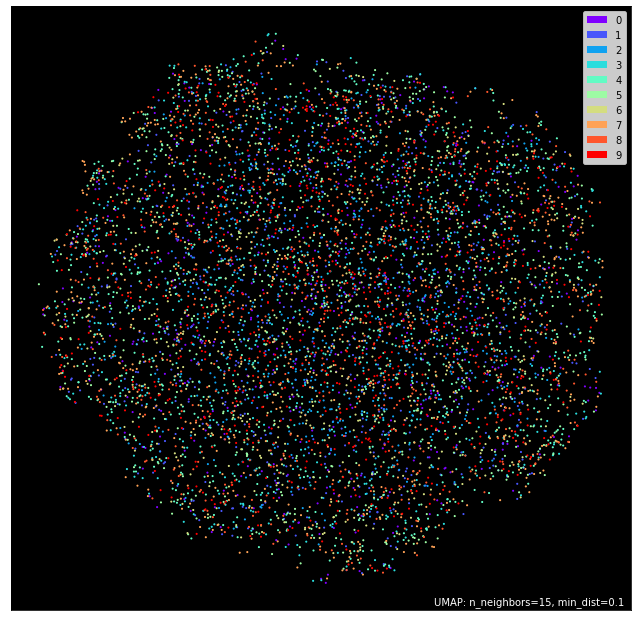

In [24]:
#UMAP Embedding of all points in sliding window point cloud GSPC
reducer = umap.UMAP(random_state=3142)
embedding_g = reducer.fit_transform(emb_g)
umap_plot_g = umap.UMAP(random_state = 3142).fit(emb_g)
#hover_data = pd.DataFrame({'label':color})
umap.plot.points(umap_plot_g, labels = np.array(color), theme = 'fire')

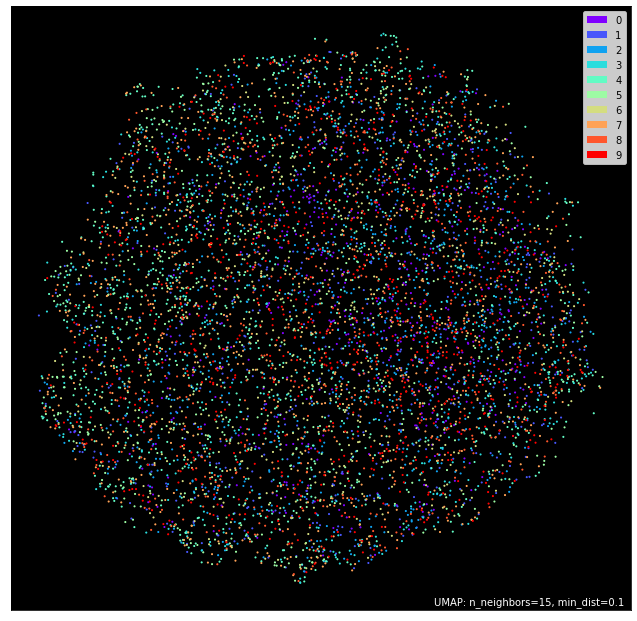

In [25]:
#UMAP Embedding of all points in sliding window point cloud IXIC
umap_plot_i = umap.UMAP(random_state = 3142).fit(emb_i)
embedding_i = reducer.fit_transform(emb_i)
#hover_data = pd.DataFrame({'label':color})
umap.plot.points(umap_plot_i, labels = np.array(color), theme = 'fire')

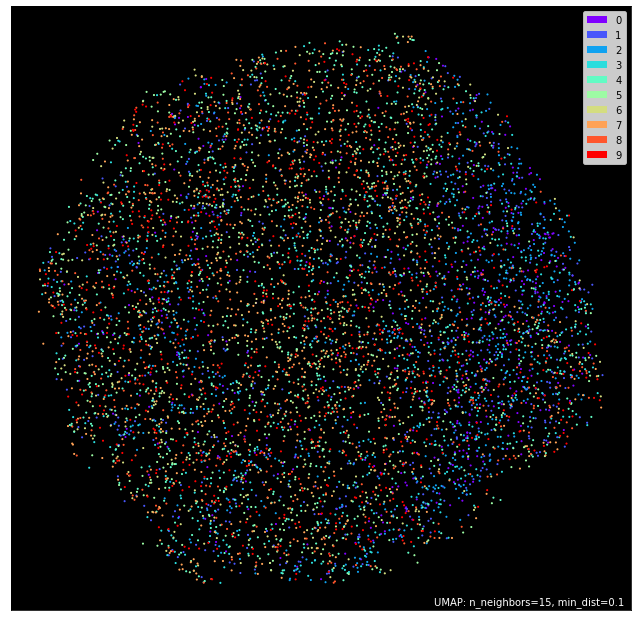

In [26]:
#UMAP Embedding of all points in sliding window point cloud RUT
umap_plot_r = umap.UMAP(random_state = 3142).fit(emb_r)
embedding_r = reducer.fit_transform(emb_r)
#hover_data = pd.DataFrame({'label':color})
umap.plot.points(umap_plot_r, labels = np.array(color), theme = 'fire')

In [74]:
#Restricting to 2007-2008 time period
print(tooltips[5000])
print(tooltips[5300])
size = 75

2007-11-05
2009-01-14


Analysing Data Around 2008 using RUT index:


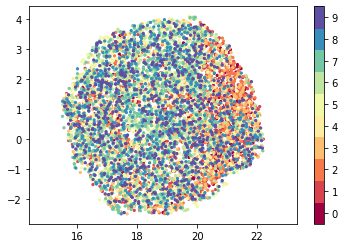

In [32]:
plt.scatter(embedding_r[:,0], embedding_r[:, 1], c = color, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

In [27]:
start = []
stop = []
size = 75
step = 50
for i in range(5000, 5300, 50):
  start.append(i)
  stop.append(i+75)

Point Cloud from: 2007-11-05 to : 2008-02-25


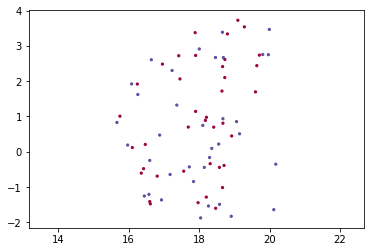

In [28]:
i = 0
print("Point Cloud from:", tooltips[start[i]], "to :", tooltips[stop[i]] )
plt.scatter(embedding_r[start[i]:stop[i],0], embedding_r[start[i]:stop[i], 1], c = color[start[i]:stop[i]], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

Point Cloud from: 2008-01-17 to : 2008-05-06


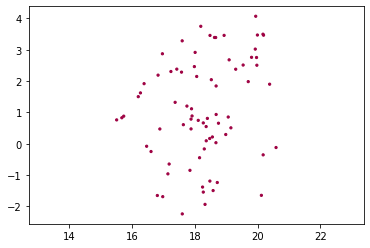

In [29]:
i = 1
print("Point Cloud from:", tooltips[start[i]], "to :", tooltips[stop[i]] )
plt.scatter(embedding_r[start[i]:stop[i],0], embedding_r[start[i]:stop[i], 1], c = color[start[i]:stop[i]], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')

Point Cloud from: 2008-04-01 to : 2008-07-17


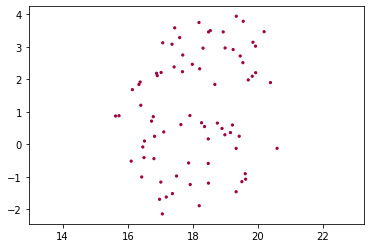

In [30]:
i = 2
print("Point Cloud from:", tooltips[start[i]], "to :", tooltips[stop[i]] )
plt.scatter(embedding_r[start[i]:stop[i],0], embedding_r[start[i]:stop[i], 1], c = color[start[i]:stop[i]], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')

Point Cloud from: 2008-06-11 to : 2008-09-26


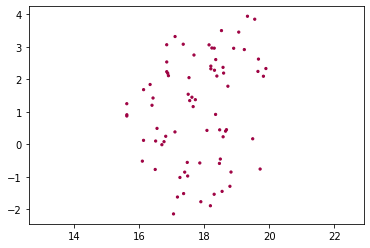

In [31]:
i = 3
print("Point Cloud from:", tooltips[start[i]], "to :", tooltips[stop[i]] )
plt.scatter(embedding_r[start[i]:stop[i],0], embedding_r[start[i]:stop[i], 1], c = color[start[i]:stop[i]], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')

Point Cloud from: 2008-08-21 to : 2008-12-08


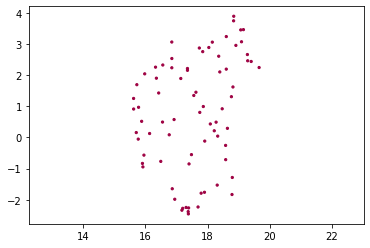

In [32]:
i = 4
print("Point Cloud from:", tooltips[start[i]], "to :", tooltips[stop[i]] )
plt.scatter(embedding_r[start[i]:stop[i],0], embedding_r[start[i]:stop[i], 1], c = color[start[i]:stop[i]], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')

Point Cloud from: 2008-10-31 to : 2009-02-20


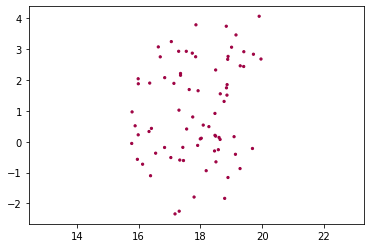

In [33]:
i = 5
print("Point Cloud from:", tooltips[start[i]], "to :", tooltips[stop[i]] )
plt.scatter(embedding_r[start[i]:stop[i],0], embedding_r[start[i]:stop[i], 1], c = color[start[i]:stop[i]], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')

In [61]:
wasserstein_distance = []
for i in range(0,6):
  points = embedding_r[start[i]:stop[i]]
  shape = np.shape(points)
  pointcloud = np.array(points).reshape(1,shape[0],shape[1])
  VR = VietorisRipsPersistence() 
  diagrams = VR.fit_transform(pointcloud)
  wasserstein_distance.append(gtda.diagrams.Amplitude(metric ='wasserstein', order = None).fit_transform(diagrams))

In [67]:
for i in range(0,6):
  print("Point Cloud:", tooltips[start[i]], "to :", tooltips[stop[i]], "; wasserstein dist:", wasserstein_distance[i][0])

Point Cloud: 2007-11-05 to : 2008-02-25 ; wasserstein dist: [1.87614237 0.44944061]
Point Cloud: 2008-01-17 to : 2008-05-06 ; wasserstein dist: [1.9999293  0.42794025]
Point Cloud: 2008-04-01 to : 2008-07-17 ; wasserstein dist: [1.8756881  0.37979747]
Point Cloud: 2008-06-11 to : 2008-09-26 ; wasserstein dist: [1.74962227 0.35433669]
Point Cloud: 2008-08-21 to : 2008-12-08 ; wasserstein dist: [1.62808619 0.31888431]
Point Cloud: 2008-10-31 to : 2009-02-20 ; wasserstein dist: [1.84316618 0.40155748]


Analysing RUT index Data from 1987 to 2016 using Wasserstein Distance:

In [36]:
start = []
stop = []
size = 75
step = 50
for i in range(0, 7290, step):
  start.append(i)
  stop.append(i+75)

In [37]:
wasserstein_distance = []
for i in range(0,len(start)):
  points = embedding_r[start[i]:stop[i]]
  shape = np.shape(points)
  pointcloud = np.array(points).reshape(1,shape[0],shape[1])
  VR = VietorisRipsPersistence() 
  diagrams = VR.fit_transform(pointcloud)
  wasserstein_distance.append(gtda.diagrams.Amplitude(metric ='wasserstein', order = None).fit_transform(diagrams))

In [38]:
dim0 = np.array(wasserstein_distance).reshape((len(start),2))[:,0]
dim1 = np.array(wasserstein_distance).reshape((len(start),2))[:,1]

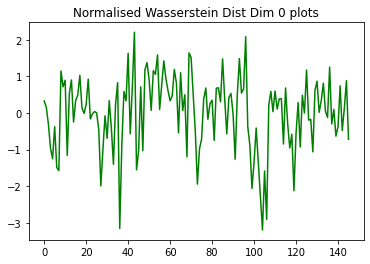

In [39]:
plt.title("Normalised Wasserstein Dist Dim 0 plots") 
y_1 = stats.zscore(dim0)
y_2 = dim0
plt.plot(np.arange(0,146), y_1, color ="green")  
plt.show()

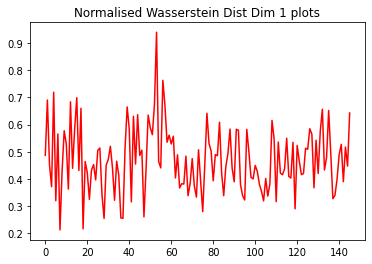

In [40]:
plt.title("Normalised Wasserstein Dist Dim 1 plots") 
y_1 = stats.zscore(dim1)
y_2 = dim1
plt.plot(np.arange(0,146), y_2, color ="red")  
plt.show()

In [41]:
ord_0 = np.argsort(-stats.zscore(dim0))[:100]
ord_1 = np.argsort(-stats.zscore(dim1))[:100]
ord_0_1 = np.argsort(stats.zscore(dim0))[:100]
ord_1_1 = np.argsort(stats.zscore(dim1))[:100] 

In [42]:
#Peaks in Dim 1 plot
for i in ord_1[:10]:
  print("Dim 1 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

Dim 1 peak :  53 corresponds to point cloud : 1998-07-02 to : 1998-10-19
Dim 1 peak :  56 corresponds to point cloud : 1999-02-05 to : 1999-05-25
Dim 1 peak :  4 corresponds to point cloud : 1988-10-21 to : 1989-02-08
Dim 1 peak :  15 corresponds to point cloud : 1990-12-26 to : 1991-04-15
Dim 1 peak :  1 corresponds to point cloud : 1988-03-21 to : 1988-07-07
Dim 1 peak :  12 corresponds to point cloud : 1990-05-23 to : 1990-09-10
Dim 1 peak :  52 corresponds to point cloud : 1998-04-22 to : 1998-08-07
Dim 1 peak :  57 corresponds to point cloud : 1999-04-20 to : 1999-08-05
Dim 1 peak :  39 corresponds to point cloud : 1995-09-25 to : 1996-01-11
Dim 1 peak :  17 corresponds to point cloud : 1991-05-20 to : 1991-09-05


In [43]:
#Dips in Dim 1 plot
for i in ord_1_1[:10]:
  print("Dim 1 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

Dim 1 dip :  7 corresponds to point cloud : 1989-05-26 to : 1989-09-13
Dim 1 dip :  18 corresponds to point cloud : 1991-07-31 to : 1991-11-14
Dim 1 dip :  28 corresponds to point cloud : 1993-07-22 to : 1993-11-05
Dim 1 dip :  37 corresponds to point cloud : 1995-05-03 to : 1995-08-18
Dim 1 dip :  36 corresponds to point cloud : 1995-02-21 to : 1995-06-08
Dim 1 dip :  47 corresponds to point cloud : 1997-04-24 to : 1997-08-11
Dim 1 dip :  75 corresponds to point cloud : 2002-11-15 to : 2003-03-07
Dim 1 dip :  119 corresponds to point cloud : 2011-08-12 to : 2011-11-29
Dim 1 dip :  41 corresponds to point cloud : 1996-02-15 to : 1996-06-04
Dim 1 dip :  110 corresponds to point cloud : 2009-10-29 to : 2010-02-18


In [44]:
#Peaks in Dim 0 plot
for i in ord_0[:10]:
  print("Dim 0 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

Dim 0 peak :  43 corresponds to point cloud : 1996-07-10 to : 1996-10-24
Dim 0 peak :  96 corresponds to point cloud : 2007-01-22 to : 2007-05-09
Dim 0 peak :  69 corresponds to point cloud : 2001-09-04 to : 2001-12-26
Dim 0 peak :  40 corresponds to point cloud : 1995-12-05 to : 1996-03-22
Dim 0 peak :  54 corresponds to point cloud : 1998-09-14 to : 1998-12-30
Dim 0 peak :  70 corresponds to point cloud : 2001-11-19 to : 2002-03-11
Dim 0 peak :  93 corresponds to point cloud : 2006-06-15 to : 2006-10-02
Dim 0 peak :  85 corresponds to point cloud : 2004-11-11 to : 2005-03-02
Dim 0 peak :  57 corresponds to point cloud : 1999-04-20 to : 1999-08-05
Dim 0 peak :  49 corresponds to point cloud : 1997-09-16 to : 1998-01-02


In [45]:
#Dips in Dim 0 plot
for i in ord_0_1[:10]:
  print("Dim 0 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

Dim 0 dip :  104 corresponds to point cloud : 2008-08-21 to : 2008-12-08
Dim 0 dip :  36 corresponds to point cloud : 1995-02-21 to : 1995-06-08
Dim 0 dip :  106 corresponds to point cloud : 2009-01-14 to : 2009-05-04
Dim 0 dip :  103 corresponds to point cloud : 2008-06-11 to : 2008-09-26
Dim 0 dip :  119 corresponds to point cloud : 2011-08-12 to : 2011-11-29
Dim 0 dip :  99 corresponds to point cloud : 2007-08-24 to : 2007-12-11
Dim 0 dip :  27 corresponds to point cloud : 1993-05-11 to : 1993-08-26
Dim 0 dip :  73 corresponds to point cloud : 2002-06-26 to : 2002-10-11
Dim 0 dip :  105 corresponds to point cloud : 2008-10-31 to : 2009-02-20
Dim 0 dip :  7 corresponds to point cloud : 1989-05-26 to : 1989-09-13


Analysing Data from 1987 to 2016 using IXIC index:

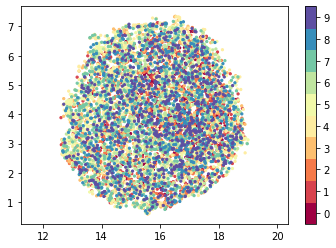

In [46]:
plt.scatter(embedding_i[:,0], embedding_i[:, 1], c = color, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

In [47]:
wasserstein_distance = []
for i in range(0,len(start)):
  points = embedding_i[start[i]:stop[i]]
  shape = np.shape(points)
  pointcloud = np.array(points).reshape(1,shape[0],shape[1])
  VR = VietorisRipsPersistence() 
  diagrams = VR.fit_transform(pointcloud)
  wasserstein_distance.append(gtda.diagrams.Amplitude(metric ='wasserstein', order = None).fit_transform(diagrams))

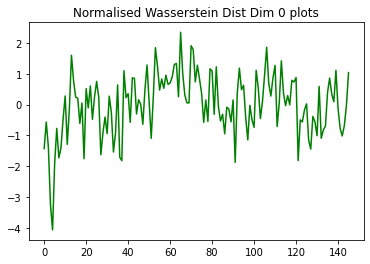

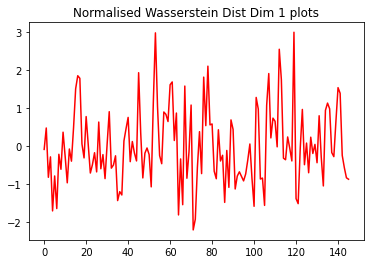

In [48]:
dim0 = np.array(wasserstein_distance).reshape((len(start),2))[:,0]
dim1 = np.array(wasserstein_distance).reshape((len(start),2))[:,1]

plt.title("Normalised Wasserstein Dist Dim 0 plots") 
y_1 = stats.zscore(dim0)
y_2 = dim0
plt.plot(np.arange(0,146), y_1, color ="green")  
plt.show()

plt.title("Normalised Wasserstein Dist Dim 1 plots") 
y_1 = stats.zscore(dim1)
y_2 = dim1
plt.plot(np.arange(0,146), y_1, color ="red")  
plt.show()

In [49]:
ord_0 = np.argsort(-stats.zscore(dim0))[:100]
ord_1 = np.argsort(-stats.zscore(dim1))[:100]
ord_0_1 = np.argsort(stats.zscore(dim0))[:100]
ord_1_1 = np.argsort(stats.zscore(dim1))[:100] 

#Peaks in Dim 1 plot
print("Dimension 1 peaks")
for i in ord_1[:10]:
  print("Dim 1 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

print("Dimension 1 dips")
#Dips in Dim 1 plot
for i in ord_1_1[:10]:
  print("Dim 1 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

print("Dimension 0 peaks")
#Peaks in Dim 0 plot
for i in ord_0[:10]:
  print("Dim 0 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

print("Dimension 0 dips")
#Dips in Dim 0 plot
for i in ord_0_1[:10]:
  print("Dim 0 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

Dimension 1 peaks
Dim 1 peak :  119 corresponds to point cloud : 2011-08-12 to : 2011-11-29
Dim 1 peak :  53 corresponds to point cloud : 1998-07-02 to : 1998-10-19
Dim 1 peak :  112 corresponds to point cloud : 2010-03-25 to : 2010-07-13
Dim 1 peak :  78 corresponds to point cloud : 2003-06-24 to : 2003-10-09
Dim 1 peak :  45 corresponds to point cloud : 1996-11-29 to : 1997-03-19
Dim 1 peak :  107 corresponds to point cloud : 2009-03-27 to : 2009-07-15
Dim 1 peak :  16 corresponds to point cloud : 1991-03-08 to : 1991-06-25
Dim 1 peak :  76 corresponds to point cloud : 2003-01-30 to : 2003-05-19
Dim 1 peak :  17 corresponds to point cloud : 1991-05-20 to : 1991-09-05
Dim 1 peak :  113 corresponds to point cloud : 2010-06-07 to : 2010-09-22
Dimension 1 dips
Dim 1 dip :  71 corresponds to point cloud : 2002-02-01 to : 2002-05-21
Dim 1 dip :  72 corresponds to point cloud : 2002-04-16 to : 2002-08-01
Dim 1 dip :  64 corresponds to point cloud : 2000-09-06 to : 2000-12-21
Dim 1 dip :  4 

Analysing Data from 1987 to 2016 using GSPC index:

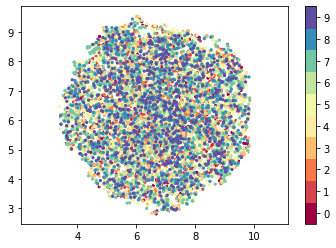

In [50]:
plt.scatter(embedding_g[:,0], embedding_g[:, 1], c = color, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

wasserstein_distance = []
for i in range(0,len(start)):
  points = embedding_g[start[i]:stop[i]]
  shape = np.shape(points)
  pointcloud = np.array(points).reshape(1,shape[0],shape[1])
  VR = VietorisRipsPersistence() 
  diagrams = VR.fit_transform(pointcloud)
  wasserstein_distance.append(gtda.diagrams.Amplitude(metric ='wasserstein', order = None).fit_transform(diagrams))

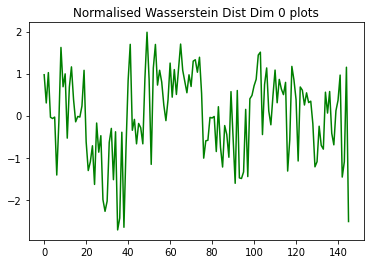

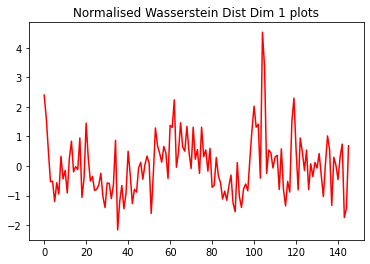

In [51]:
dim0 = np.array(wasserstein_distance).reshape((len(start),2))[:,0]
dim1 = np.array(wasserstein_distance).reshape((len(start),2))[:,1]

plt.title("Normalised Wasserstein Dist Dim 0 plots") 
y_1 = stats.zscore(dim0)
y_2 = dim0
plt.plot(np.arange(0,146), y_1, color ="green")  
plt.show()

plt.title("Normalised Wasserstein Dist Dim 1 plots") 
y_1 = stats.zscore(dim1)
y_2 = dim1
plt.plot(np.arange(0,146), y_1, color ="red")  
plt.show()

In [52]:
ord_0 = np.argsort(-stats.zscore(dim0))[:100]
ord_1 = np.argsort(-stats.zscore(dim1))[:100]
ord_0_1 = np.argsort(stats.zscore(dim0))[:100]
ord_1_1 = np.argsort(stats.zscore(dim1))[:100] 

#Peaks in Dim 1 plot
print("Dimension 1 peaks")
for i in ord_1[:10]:
  print("Dim 1 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

print("Dimension 1 dips")
#Dips in Dim 1 plot
for i in ord_1_1[:10]:
  if i >= 145 :
    k = tooltips[7289]
  if i <=144:
    k = tooltips[stop[i]]
  print("Dim 1 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", k)

print("Dimension 0 peaks")
#Peaks in Dim 0 plot
for i in ord_0[:10]:
  print("Dim 0 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

print("Dimension 0 dips")
#Dips in Dim 0 plot
for i in ord_0_1[:10]:
  if i >= 145 :
    k = tooltips[7289]
  if i <= 144:
    k = tooltips[stop[i]]
  print("Dim 0 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", k)

Dimension 1 peaks
Dim 1 peak :  104 corresponds to point cloud : 2008-08-21 to : 2008-12-08
Dim 1 peak :  105 corresponds to point cloud : 2008-10-31 to : 2009-02-20
Dim 1 peak :  0 corresponds to point cloud : 1988-01-08 to : 1988-04-26
Dim 1 peak :  119 corresponds to point cloud : 2011-08-12 to : 2011-11-29
Dim 1 peak :  62 corresponds to point cloud : 2000-04-13 to : 2000-08-01
Dim 1 peak :  100 corresponds to point cloud : 2007-11-05 to : 2008-02-25
Dim 1 peak :  1 corresponds to point cloud : 1988-03-21 to : 1988-07-07
Dim 1 peak :  118 corresponds to point cloud : 2011-06-02 to : 2011-09-19
Dim 1 peak :  65 corresponds to point cloud : 2000-11-15 to : 2001-03-07
Dim 1 peak :  20 corresponds to point cloud : 1991-12-20 to : 1992-04-08
Dimension 1 dips
Dim 1 dip :  35 corresponds to point cloud : 1994-12-08 to : 1995-03-28
Dim 1 dip :  143 corresponds to point cloud : 2016-05-20 to : 2016-09-07
Dim 1 dip :  51 corresponds to point cloud : 1998-02-09 to : 1998-05-28
Dim 1 dip :  91

Analysis using Landscapes

In [53]:
l_0 = []
l_1 = []
for i in range(0,len(start)):
  points = embedding_r[start[i]:stop[i]]
  shape = np.shape(points)
  pointcloud = np.array(points).reshape(1,shape[0],shape[1])
  VR = VietorisRipsPersistence() 
  diagrams = VR.fit_transform(pointcloud)
  value = gtda.diagrams.Amplitude(metric_params={"n_layers":250} , metric ='landscape', order = None).fit_transform(diagrams)
  l_0.append(value[0][0])
  l_1.append(value[0][1])

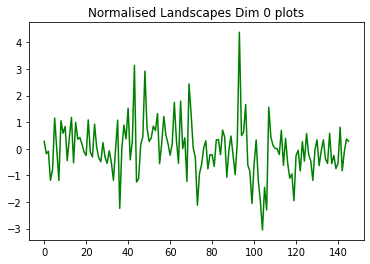

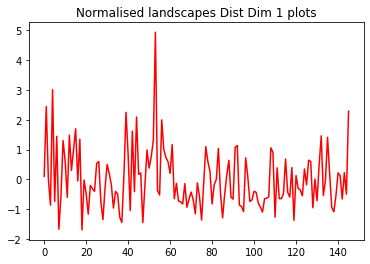

In [54]:
plt.title("Normalised Landscapes Dim 0 plots") 
y_1 = stats.zscore(l_0)
y_2 = l_0
plt.plot(np.arange(0,146), y_1, color ="green")  
plt.show()

plt.title("Normalised landscapes Dist Dim 1 plots") 
y_1 = stats.zscore(l_1)
y_2 = l_1
plt.plot(np.arange(0,146), y_1, color ="red")  
plt.show()

In [55]:
ord_0 = np.argsort(-stats.zscore(l_0))[:100]
ord_1 = np.argsort(-stats.zscore(l_1))[:100]
ord_0_1 = np.argsort(stats.zscore(l_0))[:100]
ord_1_1 = np.argsort(stats.zscore(l_1))[:100] 

#Peaks in Dim 1 plot
print("Dimension 1 peaks")
for i in ord_1[:10]:
  if i >= 145 :
    k = tooltips[7289]
  if i <=144:
    k = tooltips[stop[i]]
  print("Dim 1 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", k)

print("Dimension 1 dips")
#Dips in Dim 1 plot
for i in ord_1_1[:10]:
  if i >= 145 :
    k = tooltips[7289]
  if i <=144:
    k = tooltips[stop[i]]
  print("Dim 1 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", k)

print("Dimension 0 peaks")
#Peaks in Dim 0 plot
for i in ord_0[:10]:
  print("Dim 0 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

print("Dimension 0 dips")
#Dips in Dim 0 plot
for i in ord_0_1[:10]:
  if i >= 145 :
    k = tooltips[7289]
  if i <= 144:
    k = tooltips[stop[i]]
  print("Dim 0 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", k)

Dimension 1 peaks
Dim 1 peak :  53 corresponds to point cloud : 1998-07-02 to : 1998-10-19
Dim 1 peak :  4 corresponds to point cloud : 1988-10-21 to : 1989-02-08
Dim 1 peak :  1 corresponds to point cloud : 1988-03-21 to : 1988-07-07
Dim 1 peak :  145 corresponds to point cloud : 2016-10-12 to : 2016-12-07
Dim 1 peak :  39 corresponds to point cloud : 1995-09-25 to : 1996-01-11
Dim 1 peak :  44 corresponds to point cloud : 1996-09-19 to : 1997-01-07
Dim 1 peak :  56 corresponds to point cloud : 1999-02-05 to : 1999-05-25
Dim 1 peak :  15 corresponds to point cloud : 1990-12-26 to : 1991-04-15
Dim 1 peak :  42 corresponds to point cloud : 1996-04-29 to : 1996-08-14
Dim 1 peak :  12 corresponds to point cloud : 1990-05-23 to : 1990-09-10
Dimension 1 dips
Dim 1 dip :  18 corresponds to point cloud : 1991-07-31 to : 1991-11-14
Dim 1 dip :  7 corresponds to point cloud : 1989-05-26 to : 1989-09-13
Dim 1 dip :  47 corresponds to point cloud : 1997-04-24 to : 1997-08-11
Dim 1 dip :  37 corre

In [56]:
#Looking at differences in Wasserstein Ampliitudes between
diff_0 = []
diff_1 = []
for i in range(1,146):
  diff_0.append(abs(l_0[i]-l_0[i-1]))
  diff_1.append(abs(l_1[i]-l_1[i-1]))

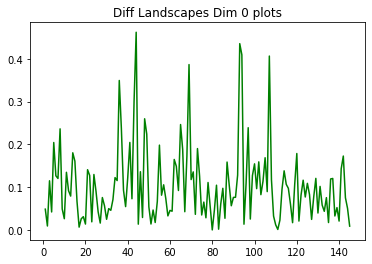

In [57]:
plt.title("Diff Landscapes Dim 0 plots") 
y_1 = diff_0
plt.plot(np.arange(1,146), y_1, color ="green")  
plt.show()

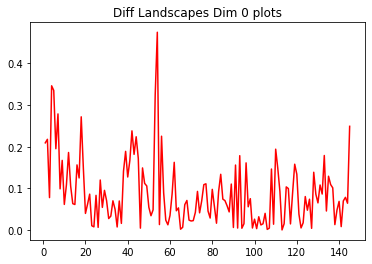

In [58]:
plt.title("Diff Landscapes Dim 0 plots") 
y_1 = diff_1
plt.plot(np.arange(1,146), y_1, color ="red")  
plt.show()

In [61]:
ord_0 = np.argsort(-np.array(diff_0))[:100] + 1
ord_1 = np.argsort(-np.array(diff_1))[:100] + 1
ord_0_1 = np.argsort(np.array(diff_0))[:100] +1 
ord_1_1 = np.argsort(np.array(diff_1))[:100] + 1

print("Dimension 1 peaks")
for i in ord_1[:10]:
  if i >= 145 :
    k = tooltips[7289]
  if i <=144:
    k = tooltips[stop[i]]
  print("Dim 1 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", k)

print("Dimension 1 dips")
#Dips in Dim 1 plot
for i in ord_1_1[:10]:
  if i >= 145 :
    k = tooltips[7289]
  if i <=144:
    k = tooltips[stop[i]]
  print("Dim 1 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", k)

print("Dimension 0 peaks")
#Peaks in Dim 0 plot
for i in ord_0[:10]:
  print("Dim 0 peak : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", tooltips[stop[i]])

print("Dimension 0 dips")
#Dips in Dim 0 plot
for i in ord_0_1[:10]:
  if i >= 145 :
    k = tooltips[7289]
  if i <= 144:
    k = tooltips[stop[i]]
  print("Dim 0 dip : ",i,"corresponds to point cloud :",tooltips[start[i]], "to :", k)

Dimension 1 peaks
Dim 1 peak :  54 corresponds to point cloud : 1998-09-14 to : 1998-12-30
Dim 1 peak :  4 corresponds to point cloud : 1988-10-21 to : 1989-02-08
Dim 1 peak :  5 corresponds to point cloud : 1989-01-04 to : 1989-04-21
Dim 1 peak :  53 corresponds to point cloud : 1998-07-02 to : 1998-10-19
Dim 1 peak :  7 corresponds to point cloud : 1989-05-26 to : 1989-09-13
Dim 1 peak :  18 corresponds to point cloud : 1991-07-31 to : 1991-11-14
Dim 1 peak :  145 corresponds to point cloud : 2016-10-12 to : 2016-12-07
Dim 1 peak :  42 corresponds to point cloud : 1996-04-29 to : 1996-08-14
Dim 1 peak :  56 corresponds to point cloud : 1999-02-05 to : 1999-05-25
Dim 1 peak :  44 corresponds to point cloud : 1996-09-19 to : 1997-01-07
Dimension 1 dips
Dim 1 dip :  113 corresponds to point cloud : 2010-06-07 to : 2010-09-22
Dim 1 dip :  106 corresponds to point cloud : 2009-01-14 to : 2009-05-04
Dim 1 dip :  65 corresponds to point cloud : 2000-11-15 to : 2001-03-07
Dim 1 dip :  101 co